In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np

# Load the Dogs vs. Cats dataset
train_dataset, info = tfds.load('cats_vs_dogs', split='train[:80%]', with_info=True, as_supervised=True)
test_dataset = tfds.load('cats_vs_dogs', split='train[80%:]', with_info=False, as_supervised=True)

# Preprocess the data
def preprocess_image(image, label):
    """Normalize and resize the images."""
    # Normalize the pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Resize the images to (150, 150)
    image = tf.image.resize(image, (150, 150))
    return image, label

# Apply preprocessing, shuffle, and batch the datasets
train_data = train_dataset.map(preprocess_image).shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_data = validation_dataset.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(150, 150, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(train_data, epochs=5, validation_data=validation_data, callbacks=[early_stopping])


Epoch 1/5
582/582 [==============================] - 1371s 2s/step - loss: 0.6652 - accuracy: 0.6167 - val_loss: 0.5894 - val_accuracy: 0.6948
Epoch 2/5
582/582 [==============================] - 1429s 2s/step - loss: 0.5386 - accuracy: 0.7251 - val_loss: 0.5184 - val_accuracy: 0.7423
Epoch 3/5
582/582 [==============================] - 1371s 2s/step - loss: 0.4268 - accuracy: 0.8050 - val_loss: 0.5293 - val_accuracy: 0.7436
Epoch 4/5
582/582 [==============================] - 1349s 2s/step - loss: 0.3055 - accuracy: 0.8687 - val_loss: 0.6308 - val_accuracy: 0.7491


In [11]:
#report the accuracy on your test set
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_data)
print(f'Validation accuracy: {validation_accuracy}')

146/146 [==============================] - 96s 653ms/step - loss: 0.5184 - accuracy: 0.7423
Validation accuracy: 0.7422614097595215


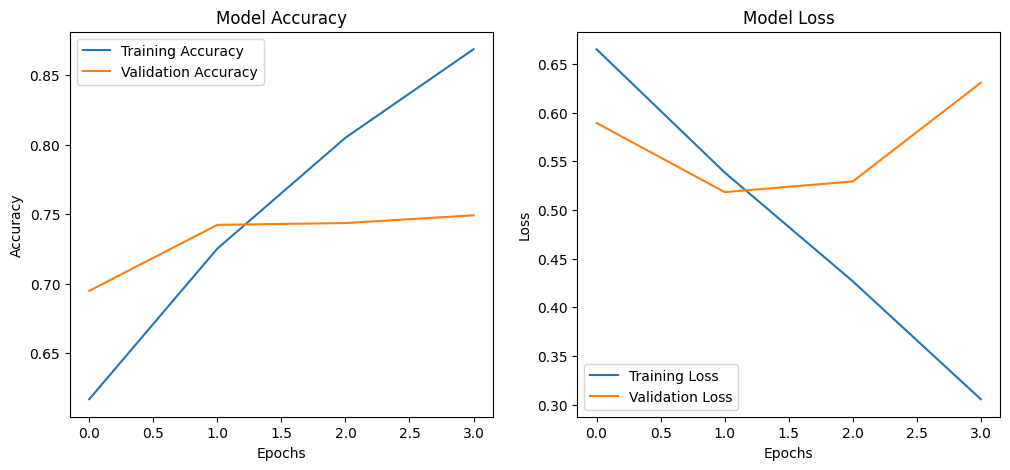

In [12]:
# Plot the accuracy and loss curves
plt.figure(figsize=(12, 5))

# Plot the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()